,Age_of_Subject,Time_spent_on_Online_Class,Rating_of_Online_Class_experience,Medium_for_online_class,Time_spent_on_self_study,Time_spent_on_fitness,Time_spent_on_sleep,Time_spent_on_social_media,Prefered_social_media_platform,Number_of_meals_per_day,Change_in_your_weight,Health_issue_during_lockdown,Time_utilized,Family_Relation,Mental_Health
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,20.165821,3.208841,2.845178,1.521997,2.875212,0.765821,7.871235,2.365694,5.483080,2.917936,0.724196,0.136210,0.485618,0.703046,0.608291
std,5.516467,2.101756,1.204236,0.781306,1.995618,0.724451,1.615762,1.767336,1.755398,0.828698,0.744206,0.343156,0.500005,0.457110,0.488339
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,7.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,3.000000,3.000000,1.000000,2.000000,1.000000,8.000000,2.000000,6.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,21.000000,5.000000,4.000000,2.000000,4.000000,1.000000,9.000000,3.000000,7.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,59.000000,10.000000,5.000000,7.000000,10.000000,5.000000,15.000000,10.000000,13.000000,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000


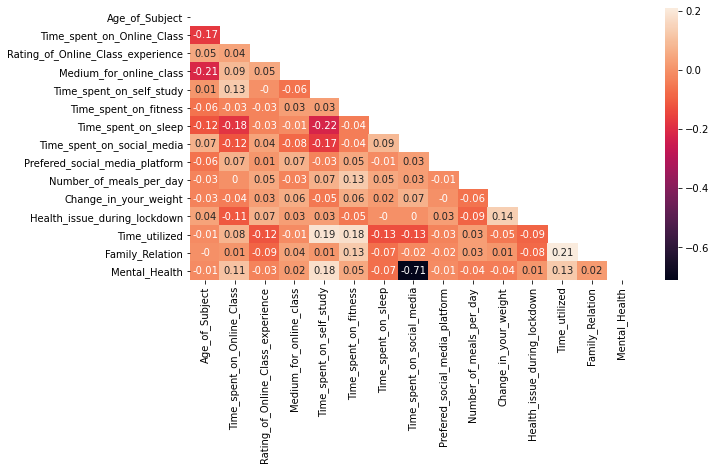

In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn import metrics
from sklearn import utils
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 1
df = pd.read_csv("Dataset3.csv")
#df.pop("Mental_Health")
df = df.dropna()
correlation_matrix = df.corr().round(2)
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 5))
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);
del df["ID"]
df.to_csv('exp.csv', index=False, encoding='utf-8')
df.describe()

In [2]:
# make a new df made of all the columns, except the target class
X = df[['Time_spent_on_Online_Class', 'Time_spent_on_self_study', 'Time_utilized']]
y = df['Time_spent_on_social_media']
y = y.astype(int)
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)


df6 = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

df6.to_csv('exp_smoted.csv', index=False, encoding='utf-8')

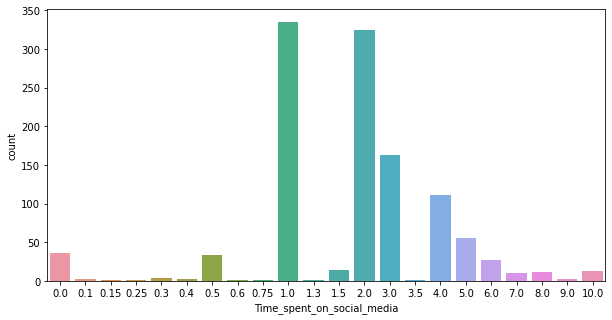

In [3]:
df1 = pd.read_csv("dataset3.csv")
df1 = df1.sample(1150)
plt.figure(figsize = (10, 5))
sns.countplot(df1['Time_spent_on_social_media'])
plt.show()

In [4]:
df2 = pd.read_csv("exp_smoted.csv")
df2 = df2.dropna()
df2["Time_spent_on_social_media"]
df2.Time_spent_on_social_media.value_counts()
df2.describe()

,Time_spent_on_Online_Class,Time_spent_on_self_study,Time_utilized,Time_spent_on_social_media
count,3949.000000,3949.000000,3949.000000,3949.000000
mean,3.087887,2.527482,0.304887,5.000000
std,2.176495,1.794338,0.460418,3.162678
min,0.000000,0.000000,0.000000,0.000000
25%,1.460900,1.102027,0.000000,2.000000
50%,3.000000,2.000000,0.000000,5.000000
75%,4.369835,3.450069,1.000000,8.000000
max,10.000000,10.000000,1.000000,10.000000


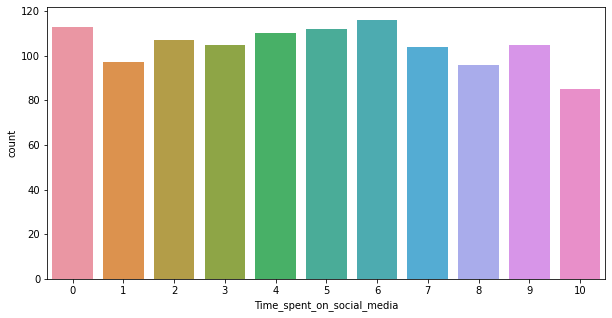

In [5]:
df1 = pd.read_csv("exp_smoted.csv")
df1 = df1.sample(1150)
plt.figure(figsize = (10, 5))
sns.countplot(df1['Time_spent_on_social_media'])
plt.show()

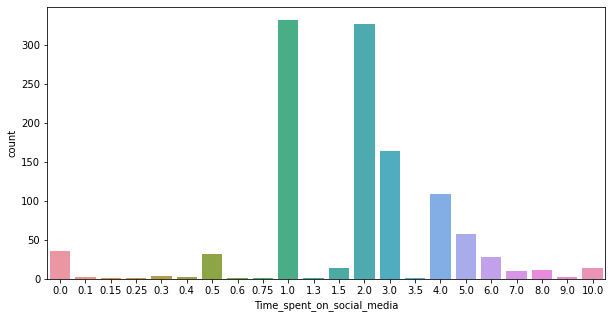

In [6]:
df1 = pd.read_csv("dataset3.csv")
df1 = df1.sample(1150)
plt.figure(figsize = (10, 5))
sns.countplot(df1['Time_spent_on_social_media'])
plt.show()

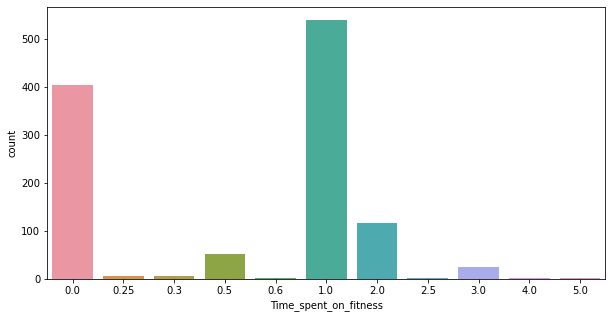

In [7]:
df1 = pd.read_csv("dataset3.csv")
df1 = df1.sample(1150)
plt.figure(figsize = (10, 5))
sns.countplot(df1['Time_spent_on_fitness'])
plt.show()

In [8]:
# make a new df made of all the columns, except the target class
X = df[['Number_of_meals_per_day','Change_in_your_weight','Time_spent_on_Online_Class', 'Time_spent_on_self_study', 'Time_utilized']]
y = df['Time_spent_on_social_media']
y = y.astype(int)
X = X.astype(int)
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)
df4 = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df4.to_csv('fitness_smoted.csv', index=False, encoding='utf-8')

In [9]:
df.describe()

,Age_of_Subject,Time_spent_on_Online_Class,Rating_of_Online_Class_experience,Medium_for_online_class,Time_spent_on_self_study,Time_spent_on_fitness,Time_spent_on_sleep,Time_spent_on_social_media,Prefered_social_media_platform,Number_of_meals_per_day,Change_in_your_weight,Health_issue_during_lockdown,Time_utilized,Family_Relation,Mental_Health
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,20.165821,3.208841,2.845178,1.521997,2.875212,0.765821,7.871235,2.365694,5.483080,2.917936,0.724196,0.136210,0.485618,0.703046,0.608291
std,5.516467,2.101756,1.204236,0.781306,1.995618,0.724451,1.615762,1.767336,1.755398,0.828698,0.744206,0.343156,0.500005,0.457110,0.488339
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,7.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,3.000000,3.000000,1.000000,2.000000,1.000000,8.000000,2.000000,6.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,21.000000,5.000000,4.000000,2.000000,4.000000,1.000000,9.000000,3.000000,7.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,59.000000,10.000000,5.000000,7.000000,10.000000,5.000000,15.000000,10.000000,13.000000,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.groupby("Time_spent_on_fitness").size()


Time_spent_on_fitness
0.00    419
0.25      6
0.30      5
0.50     53
0.60      2
1.00    550
2.00    119
2.50      1
3.00     25
4.00      1
5.00      1
dtype: int64

In [11]:
df = df[df.Time_spent_on_fitness != 2.50]
df = df[df.Time_spent_on_fitness != 4.00]
df = df[df.Time_spent_on_fitness != 5.00]

In [12]:
df.groupby("Time_spent_on_fitness").size()

Time_spent_on_fitness
0.00    419
0.25      6
0.30      5
0.50     53
0.60      2
1.00    550
2.00    119
3.00     25
dtype: int64

In [13]:
X = df[['Number_of_meals_per_day', 'Time_utilized']]
y = df['Time_spent_on_fitness']
y = y.astype(int)
X = X.astype(int)
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)
df4 = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df4.to_csv('fitness_smoted.csv', index=False, encoding='utf-8')

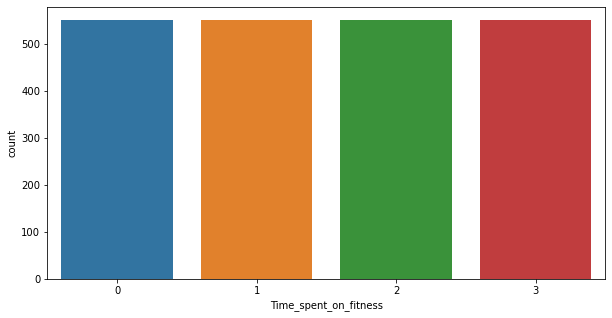

In [14]:
df1 = pd.read_csv("fitness_smoted.csv")
plt.figure(figsize = (10,5))
sns.countplot(df1['Time_spent_on_fitness'])
plt.show()

In [15]:
df.describe()

,Age_of_Subject,Time_spent_on_Online_Class,Rating_of_Online_Class_experience,Medium_for_online_class,Time_spent_on_self_study,Time_spent_on_fitness,Time_spent_on_sleep,Time_spent_on_social_media,Prefered_social_media_platform,Number_of_meals_per_day,Change_in_your_weight,Health_issue_during_lockdown,Time_utilized,Family_Relation,Mental_Health
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,20.167091,3.209372,2.844784,1.519084,2.870653,0.758015,7.872604,2.361111,5.484309,2.914334,0.724343,0.136556,0.485157,0.702290,0.608142
std,5.522456,2.100771,1.205743,0.771038,1.985304,0.706721,1.616890,1.754670,1.754078,0.821169,0.743627,0.343524,0.499992,0.457445,0.488372
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,7.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,3.000000,3.000000,1.000000,2.000000,1.000000,8.000000,2.000000,6.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,21.000000,5.000000,4.000000,2.000000,4.000000,1.000000,9.000000,3.000000,7.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,59.000000,10.000000,5.000000,7.000000,10.000000,3.000000,15.000000,10.000000,13.000000,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
X = df[['Age_of_Subject','Time_spent_on_Online_Class','Rating_of_Online_Class_experience','Medium_for_online_class','Time_spent_on_self_study','Time_spent_on_fitness','Time_spent_on_sleep','Prefered_social_media_platform', 'Number_of_meals_per_day','Change_in_your_weight','Health_issue_during_lockdown','Time_utilized','Family_Relation','Mental_Health']]
y = df['Time_spent_on_social_media']
y = y.astype(int)
#X = X.astype(int)
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)
df4 = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df4.to_csv('Final.csv', index=False, encoding='utf-8')

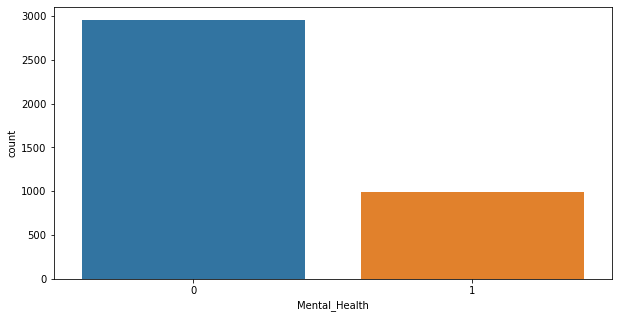

In [17]:
df1 = pd.read_csv("Final.csv")
plt.figure(figsize = (10, 5))
sns.countplot(df1['Mental_Health'])
plt.show()

In [18]:
X = df1[['Age_of_Subject','Time_spent_on_Online_Class','Rating_of_Online_Class_experience','Medium_for_online_class','Time_spent_on_self_study','Time_spent_on_fitness','Time_spent_on_sleep','Time_spent_on_social_media','Prefered_social_media_platform', 'Number_of_meals_per_day','Change_in_your_weight','Health_issue_during_lockdown','Time_utilized','Family_Relation']]
y = df1['Mental_Health']
y = y.astype(int)
#X = X.astype(int)
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)
df4 = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df4.to_csv('Final1.csv', index=False, encoding='utf-8')

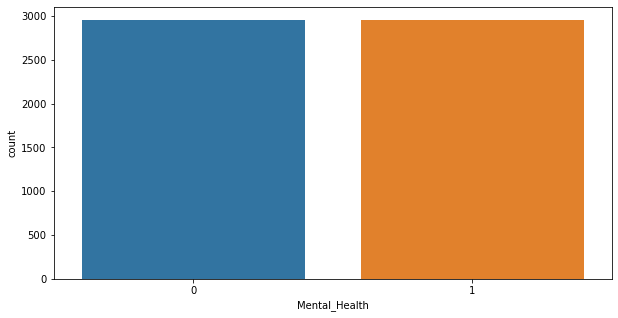

In [19]:
df1 = pd.read_csv("Final1.csv")

plt.figure(figsize = (10, 5))
sns.countplot(df1['Mental_Health'])
plt.show()

In [20]:

#for x in df1.index:
   # if df1.loc[x, "Time_spent_on_TV"] == " ":
      #  df1.loc[x, "Time_spent_on_TV"] = 0
       # print("hello")

#df1["Time_spent_on_TV"] = df1["Time_spent_on_TV"].astype(float)

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5906 entries, 0 to 5905
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age_of_Subject                     5906 non-null   int64  
 1   Time_spent_on_Online_Class         5906 non-null   float64
 2   Rating_of_Online_Class_experience  5906 non-null   int64  
 3   Medium_for_online_class            5906 non-null   int64  
 4   Time_spent_on_self_study           5906 non-null   float64
 5   Time_spent_on_fitness              5906 non-null   float64
 6   Time_spent_on_sleep                5906 non-null   float64
 7   Time_spent_on_social_media         5906 non-null   int64  
 8   Prefered_social_media_platform     5906 non-null   int64  
 9   Number_of_meals_per_day            5906 non-null   int64  
 10  Change_in_your_weight              5906 non-null   int64  
 11  Health_issue_during_lockdown       5906 non-null   int64

In [21]:
X, y = df1.loc[:,df1.columns!='Mental_Health'], df1['Mental_Health']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5315, 14)
X_test shape:  (591, 14)
y_train shape:  (5315,)
y_test shape:  (591,)


In [22]:
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
pred_1=model_svm.predict(X_test)
con_mat = confusion_matrix(y_test, pred_1)
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
clf_report = classification_report(y_test, pred_1)
print("---------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("---------------------------------")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))

NameError: name 'confusion_matrix' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
pred_2=model_dt.predict(X_test)
con_mat = confusion_matrix(y_test, pred_2)
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
clf_report = classification_report(y_test, pred_2)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")
# save the accuracy score
score.add(('DT', score_dt))


In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
pred_3=model_knn.predict(X_test)
con_mat = confusion_matrix(y_test, pred_3)
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
clf_report = classification_report(y_test, pred_3)
print("---------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("---------------------------------")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")


# save the accuracy score
score.add(('KNN', score_knn))


In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output

score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
pred_4=model_dt.predict(X_test)
con_mat = confusion_matrix(y_test, pred_4)

clf_report = classification_report(y_test, pred_4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")
# save the accuracy score
score.add(('LR', score_lr))


In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
pred_5=model_nb.predict(X_test)
con_mat = confusion_matrix(y_test, pred_5)
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
clf_report = classification_report(y_test, pred_5)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")
# save the accuracy score
score.add(('NB', score_nb))

In [ ]:
print("The accuracy scores of different Models Before Smote:")
print("----------------------------------------")
for s in score:
 print(s)

(4134, 10) (886, 10) (886, 10) (4134,) (886,) (886,)
Epoch 1/100
130/130 [==============================] - 1s 5ms/step - loss: 0.6821 - accuracy: 0.4340 - val_loss: 0.6739 - val_accuracy: 0.3939
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.4315 - val_loss: 0.6701 - val_accuracy: 0.4199
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.4480 - val_loss: 0.6669 - val_accuracy: 0.4526
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.4913 - val_loss: 0.6624 - val_accuracy: 0.4458
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.4964 - val_loss: 0.6591 - val_accuracy: 0.4729
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.5121 - val_loss: 0.6552 - val_accuracy: 0.4628
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6641 - accur

130/130 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.5890 - val_loss: 0.5429 - val_accuracy: 0.5948
Epoch 58/100
130/130 [==============================] - 0s 3ms/step - loss: 0.5807 - accuracy: 0.5977 - val_loss: 0.5372 - val_accuracy: 0.5914
Epoch 59/100
130/130 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.5953 - val_loss: 0.5372 - val_accuracy: 0.5948
Epoch 60/100
130/130 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.6018 - val_loss: 0.5322 - val_accuracy: 0.5892
Epoch 61/100
130/130 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.5965 - val_loss: 0.5321 - val_accuracy: 0.5948
Epoch 62/100
130/130 [==============================] - 0s 3ms/step - loss: 0.5759 - accuracy: 0.5972 - val_loss: 0.5264 - val_accuracy: 0.5745
Epoch 63/100
130/130 [==============================] - 0s 3ms/step - loss: 0.5749 - accuracy: 0.5970 - val_loss: 0.5244 - val_accuracy: 0.5632
Epoch

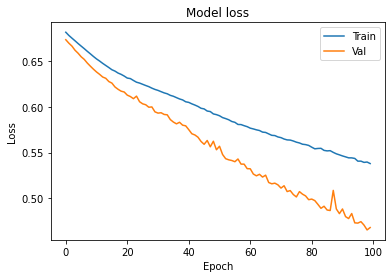

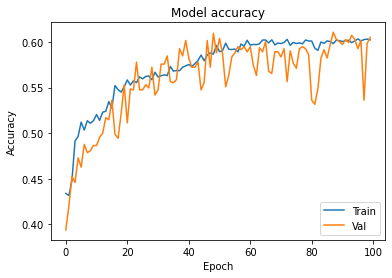

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

df1 = pd.read_csv("Final1.csv")
dataset=df1.values
dataset
X = dataset[:,0:10]
Y = dataset[:,10]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

model.evaluate(X_test, Y_test)[1]

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
130/130 [==============================] - 4s 28ms/step - loss: 0.6292 - accuracy: 0.5520 - val_loss: 0.4585 - val_accuracy: 0.6388
Epoch 2/100
130/130 [==============================] - 3s 26ms/step - loss: 0.1522 - accuracy: 0.5958 - val_loss: -12.9359 - val_accuracy: 0.5801
Epoch 3/100
130/130 [==============================] - 3s 26ms/step - loss: 0.7048 - accuracy: 0.5561 - val_loss: 0.5608 - val_accuracy: 0.6005
Epoch 4/100
130/130 [==============================] - 3s 26ms/step - loss: 0.5567 - accuracy: 0.5907 - val_loss: 0.4094 - val_accuracy: 0.6275
Epoch 5/100
130/130 [==============================] - 3s 26ms/step - loss: 0.4502 - accuracy: 0.6263 - val_loss: 0.1521 - val_accuracy: 0.6140
Epoch 6/100
130/130 [==============================] - 3s 26ms/step - loss: -0.8101 - accuracy: 0.5994 - val_loss: -11.6672 - val_accuracy: 0.6275
Epoch 7/100
130/130 [==============================] - 3s 26ms/step - loss: -1.8339 - accuracy: 0.5743 - val_loss: 0.5426 - val_acc

130/130 [==============================] - 3s 26ms/step - loss: -37951.8125 - accuracy: 0.5629 - val_loss: -82541.7812 - val_accuracy: 0.5440
Epoch 57/100
130/130 [==============================] - 3s 26ms/step - loss: -54822.7461 - accuracy: 0.5670 - val_loss: -130416.7656 - val_accuracy: 0.6129
Epoch 58/100
130/130 [==============================] - 3s 26ms/step - loss: -74274.5547 - accuracy: 0.5484 - val_loss: -172429.2344 - val_accuracy: 0.4977
Epoch 59/100
130/130 [==============================] - 3s 26ms/step - loss: -102980.9062 - accuracy: 0.5641 - val_loss: -235875.5000 - val_accuracy: 0.5869
Epoch 60/100
130/130 [==============================] - 3s 26ms/step - loss: -131738.0938 - accuracy: 0.5605 - val_loss: -300728.9375 - val_accuracy: 0.3962
Epoch 61/100
130/130 [==============================] - 3s 26ms/step - loss: -177684.0000 - accuracy: 0.5648 - val_loss: -382465.2188 - val_accuracy: 0.3781
Epoch 62/100
130/130 [==============================] - 3s 26ms/step - loss

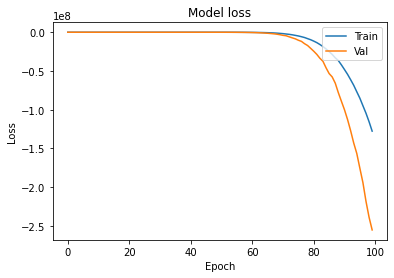

In [25]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

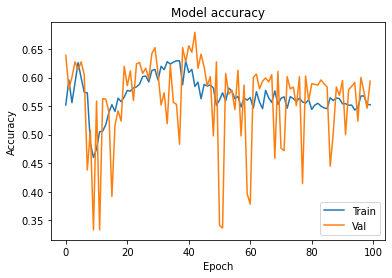

In [27]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

Epoch 1/100
130/130 [==============================] - 6s 40ms/step - loss: 4.3252 - accuracy: 0.3587 - val_loss: 0.6924 - val_accuracy: 0.3330
Epoch 2/100
130/130 [==============================] - 5s 37ms/step - loss: 0.6930 - accuracy: 0.3537 - val_loss: 0.6918 - val_accuracy: 0.3330
Epoch 3/100
130/130 [==============================] - 5s 38ms/step - loss: 0.6926 - accuracy: 0.3537 - val_loss: 0.6914 - val_accuracy: 0.3330
Epoch 4/100
130/130 [==============================] - 5s 37ms/step - loss: 0.6926 - accuracy: 0.3537 - val_loss: 0.6913 - val_accuracy: 0.3330
Epoch 5/100
130/130 [==============================] - 5s 37ms/step - loss: 0.6928 - accuracy: 0.3537 - val_loss: 0.6915 - val_accuracy: 0.3330
Epoch 6/100
130/130 [==============================] - 5s 38ms/step - loss: 0.6926 - accuracy: 0.3537 - val_loss: 0.6913 - val_accuracy: 0.3330
Epoch 7/100
130/130 [==============================] - 5s 38ms/step - loss: 0.6925 - accuracy: 0.3537 - val_loss: 0.6913 - val_accuracy:

In [ ]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()